<a href="https://colab.research.google.com/github/Onic1980/Onic1980/blob/main/pre_processed_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt






In [34]:
def enhance_xray_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Чтение изображения в оттенках серого

    # Улучшение контраста с помощью адаптивной гистограммной эквализации
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(4, 4))
    enhanced = clahe.apply(image)

    # Применение фильтра Canny для выделения контуров объектов
    edges = cv2.Canny(enhanced, 10, 100)

    # Использование морфологической операции для устранения шума
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Объединение контуров с исходным изображением
    result = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), 0.7, cv2.cvtColor(cleaned, cv2.COLOR_GRAY2BGR), 0.3, 0)

    # Сохранение улучшенного изображения в формате TIFF
    enhanced_image_path ='/content/drive/MyDrive/Detection'+ image_path.split('/')[-1]
    cv2.imwrite(enhanced_image_path, result)
    fig,ax=plt.subplots(1,2)
    ax[0].imshow(result, cmap = 'gray')
    plt.axis('off')
    fig.set_figheight(40)
    fig.set_figwidth(20)
    ax[1].imshow(image, cmap = 'gray')
    plt.axis('off')
    plt.show()
    return enhanced_image_path


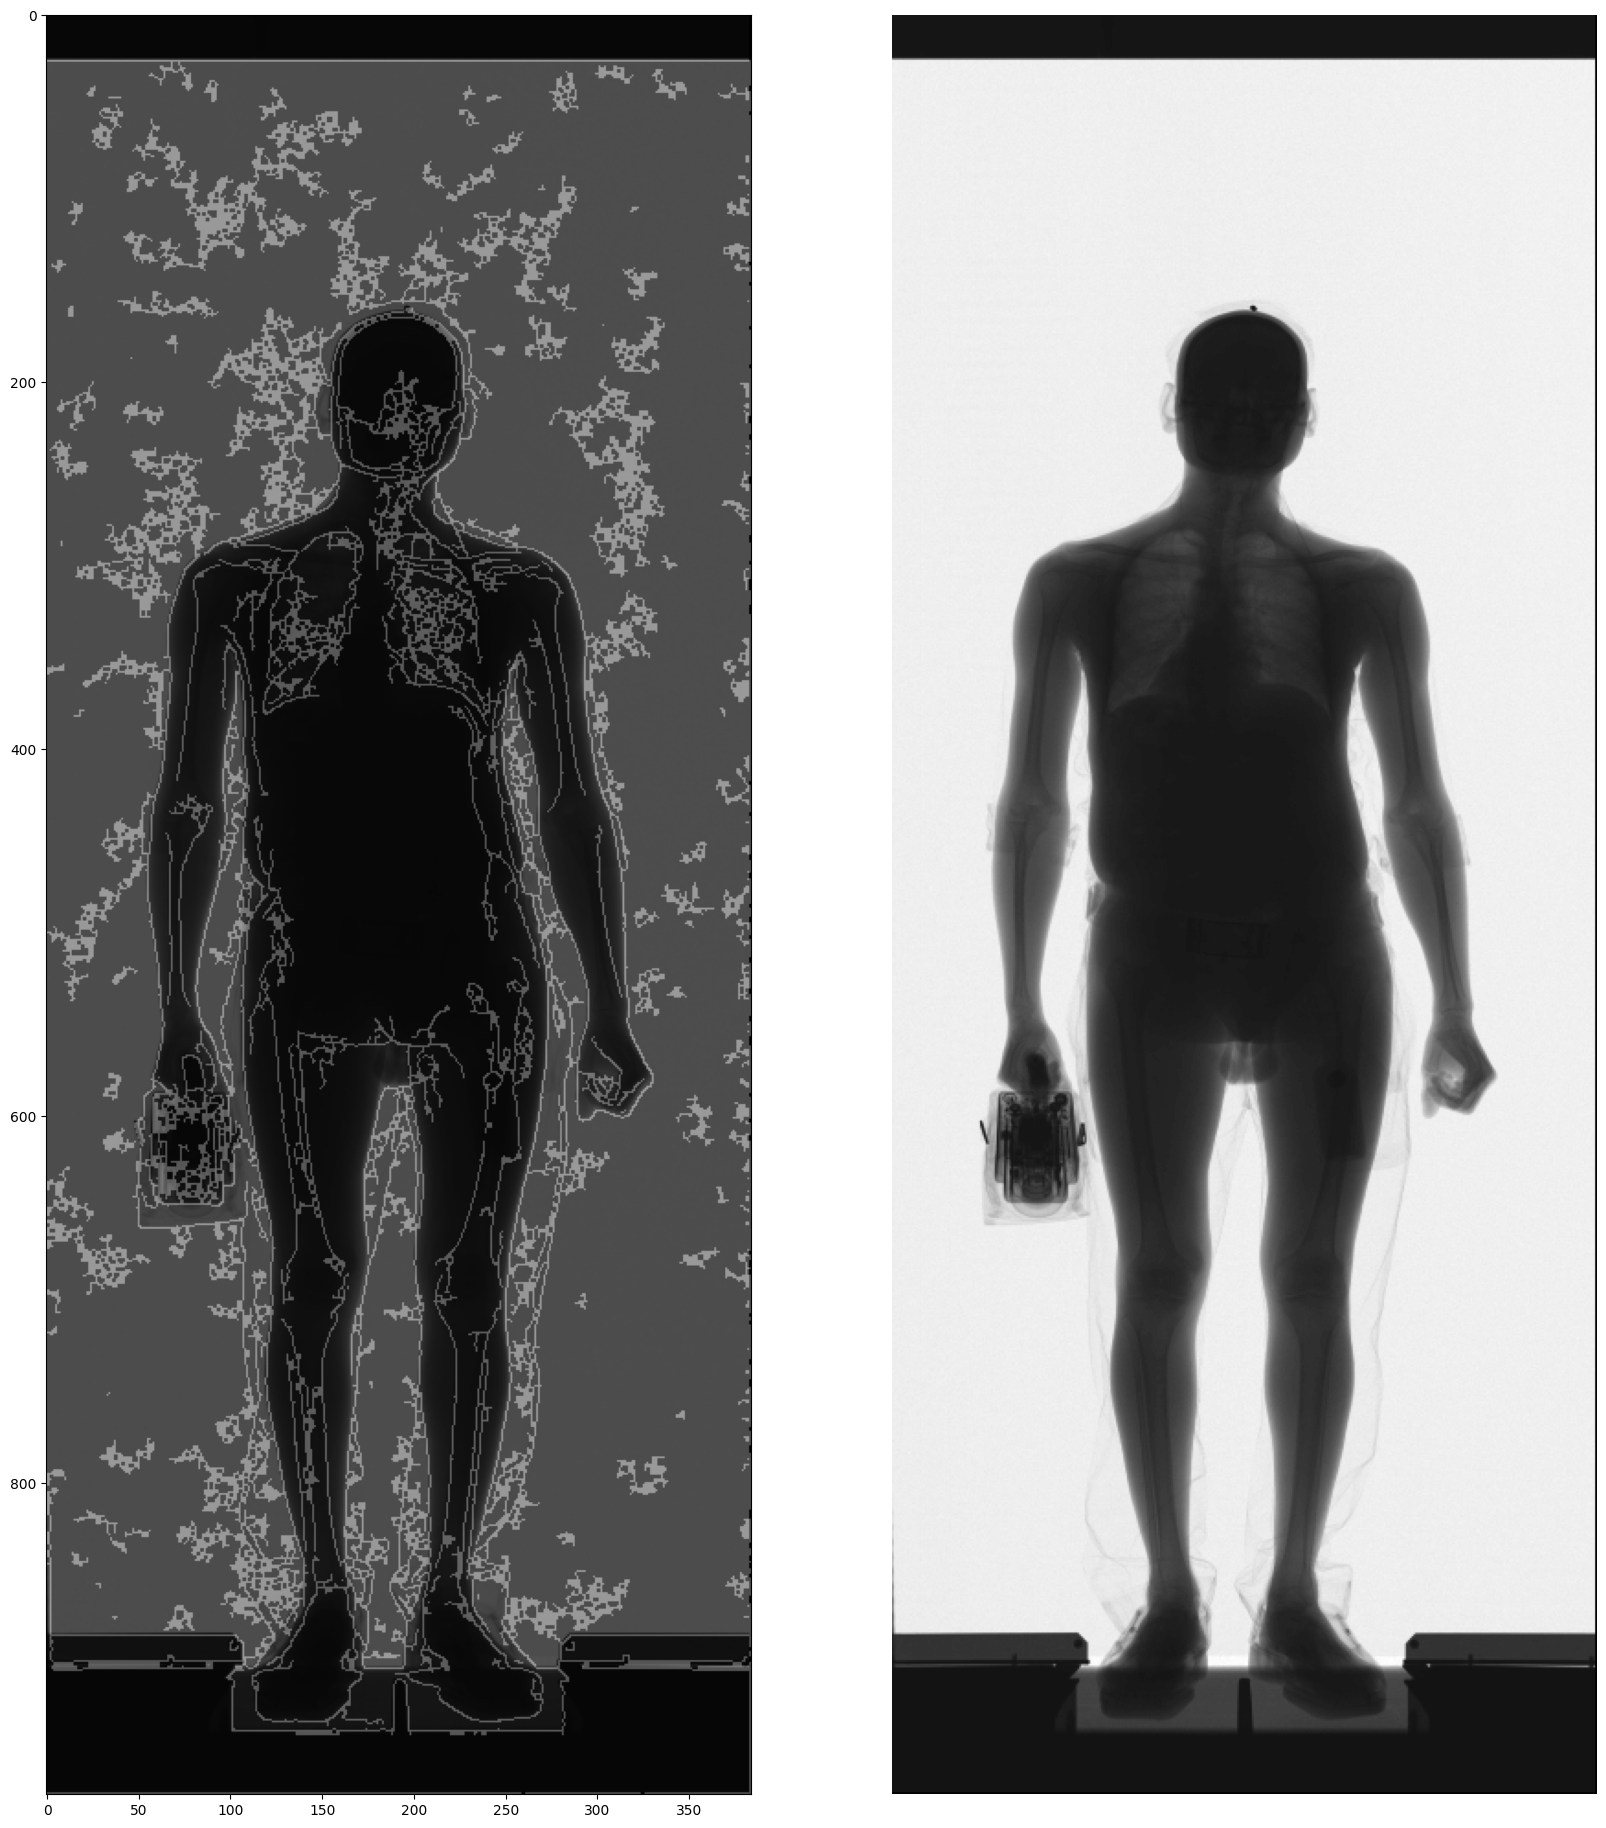

Улучшенное изображение сохранено как: /content/drive/MyDrive/Detection2017-10-06T10-37-40_241.tif


In [35]:
# Пример использования
xray_image_path = "/content/drive/MyDrive/Detection/DataSet/2017-10-06T10-37-40_241.tif"
enhanced_image_path = enhance_xray_image(xray_image_path)
print("Улучшенное изображение сохранено как:", enhanced_image_path)